In [1]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install pygeos
!pip install topojson
!pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 21.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 32.5 MB/s eta 0:00:0000:0100:01


In [2]:
import numpy as np  # Importe la bibliothèque NumPy sous l'alias np
import pandas as pd  # Importe la bibliothèque Pandas sous l'alias pd
import geopandas as gpd  # Importe la bibliothèque GeoPandas sous l'alias gpd
import contextily as ctx  # Importe la bibliothèque Contextily sous l'alias ctx
import geoplot  # Importe la bibliothèque GeoPlot
import matplotlib.pyplot as plt  # Importe le sous-module pyplot de Matplotlib sous l'alias plt
import folium  # Importe la bibliothèque Folium

# Chemin du fichier au format Stata à lire
chemin_dta = "/home/onyxia/work/monocentric-model-colombia-2021/data_base_enrichie_totalement_clean.dta"

# Lecture du fichier Stata et stockage des données dans un DataFrame nommé 'c'
c = pd.read_stata(chemin_dta)

# Affichage des dix premières lignes du DataFrame 'c'
print(c.head(10))


ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


   DIRECTORIO  SECUENCIA_P  ORDEN  HOGAR REGIS  P6016  gender  P6030S1  \
0   6037206.0          1.0    1.0    1.0    10    1.0     1.0      1.0   
1   6037207.0          1.0    1.0    1.0    10    1.0     1.0      1.0   
2   6037209.0          1.0    1.0    1.0    10    1.0     2.0     11.0   
3   6037210.0          1.0    1.0    1.0    10    1.0     1.0      8.0   
4   6037211.0          1.0    1.0    1.0    10    1.0     2.0      8.0   
5   6037212.0          1.0    1.0    1.0    10    1.0     1.0      1.0   
6   6037213.0          1.0    1.0    1.0    10    1.0     2.0      2.0   
7   6037214.0          1.0    1.0    1.0    10    1.0     1.0      2.0   
8   6037215.0          1.0    1.0    1.0    10    1.0     2.0      9.0   
9   6037216.0          1.0    1.0    1.0    10    1.0     2.0     11.0   

   P6030S3   age  ...  own_status  territory  rent_reel  log_rent_reel  \
0   1963.0  58.0  ...           0          3   800000.0      13.592367   
1   1979.0  42.0  ...           0    

<Axes: >

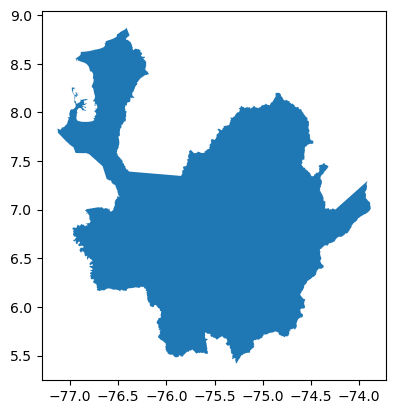

In [9]:
# Import de la bibliothèque GeoPandas pour la manipulation de données géospatiales
import geopandas as gpd  

# Chemin du fichier Shapefile (.shx) à lire
chemin_shapefile = "/home/onyxia/work/monocentric-model-colombia-2021/MGN_DPTO_POLITICO.shx"

# Lecture du fichier Shapefile et stockage des données dans un GeoDataFrame nommé 'gdf'
gdf = gpd.read_file(chemin_shapefile)

# Affichage d'une visualisation basique des données géospatiales contenues dans le GeoDataFrame 'gdf'
gdf.plot()



In [10]:
# Extraction de la colonne 'DPTO' du DataFrame 'c'
dep = c['DPTO']

# Fonction 'is_in' pour vérifier si une valeur est présente dans un tableau
def is_in(tab, value):
    for i in range(len(tab)-1):
        if value == tab[i]:
            return True
    return False 

# Initialisation d'une liste 'dpto' pour stocker les valeurs uniques de la colonne 'DPTO'
dpto = []

# Boucle pour trouver les valeurs uniques dans la colonne 'DPTO' et les stocker dans 'dpto'
for i in range(len(dep)-1):
    if dep[i] != dep[i+1]:
        if is_in(dpto, dep[i]) == False:
            dpto.append(dep[i])

# Suppression du dernier élément de la liste 'dpto' qui y était deux fois
dpto = dpto[:len(dpto)-1]

# Affichage des valeurs uniques trouvées dans 'dpto' pour vérifier
print(dpto)

# Création d'un DataFrame 'corr_gps' à partir de la liste 'dpto' avec la colonne 'DPTO'
corr_gps = pd.DataFrame({"DPTO": dpto})

# Affichage du DataFrame 'corr_gps' contenant les valeurs uniques de 'DPTO'
print(corr_gps)


[5, 8, 11, 13, 17, 23, 50, 52, 54, 66, 68, 73, 76, 76, 15, 44, 18, 20, 27, 41, 47, 63, 70, 19, 19, 25]
    DPTO
0      5
1      8
2     11
3     13
4     17
5     23
6     50
7     52
8     54
9     66
10    68
11    73
12    76
13    76
14    15
15    44
16    18
17    20
18    27
19    41
20    47
21    63
22    70
23    19
24    19
25    25


In [11]:
# Ajout d'une colonne 'coord' à partir de sélections spécifiques de géométries du GeoDataFrame 'gdf'
corr_gps['coord'] = (
    gdf.iloc[1]['geometry'],        # Sélection de la géométrie à l'index 1 dans 'gdf'
    gdf.iloc[2]['geometry'],        # Sélection de la géométrie à l'index 2 dans 'gdf'
    gdf.iloc[3]['geometry'],        # Sélection de la géométrie à l'index 3 dans 'gdf'
    gdf.iloc[4]['geometry'],        # Sélection de la géométrie à l'index 4 dans 'gdf'
    gdf.iloc[6]['geometry'],        # Sélection de la géométrie à l'index 6 dans 'gdf'
    gdf.iloc[10]['geometry'],       # Sélection de la géométrie à l'index 10 dans 'gdf'
    gdf.iloc[16]['geometry'],       # Sélection de la géométrie à l'index 16 dans 'gdf'
    gdf.iloc[17]['geometry'],       # Sélection de la géométrie à l'index 17 dans 'gdf'
    gdf.iloc[18]['geometry'],       # Sélection de la géométrie à l'index 18 dans 'gdf'
    gdf.iloc[20]['geometry'],       # Sélection de la géométrie à l'index 20 dans 'gdf'
    gdf.iloc[21]['geometry'],       # Sélection de la géométrie à l'index 21 dans 'gdf'
    gdf.iloc[23]['geometry'],       # Sélection de la géométrie à l'index 23 dans 'gdf'
    gdf.iloc[24]['geometry']        # Sélection de la géométrie à l'index 24 dans 'gdf'
)

# Affichage du DataFrame 'corr_gps' contenant la colonne 'DPTO' et la colonne nouvellement ajoutée 'coord'
print(corr_gps)


ValueError: Length of values (13) does not match length of index (26)

In [12]:

# Fusionner les DataFrames sur la colonne 'DPTO'
c_new = pd.merge(c, corr_gps, on='DPTO')

# Afficher les 30 premières lignes du DataFrame final avec les coordonnées géospatiales
print(c_new.head(30))



    DIRECTORIO  SECUENCIA_P  ORDEN  HOGAR REGIS  P6016  gender  P6030S1  \
0    6037206.0          1.0    1.0    1.0    10    1.0     1.0      1.0   
1    6037207.0          1.0    1.0    1.0    10    1.0     1.0      1.0   
2    6037209.0          1.0    1.0    1.0    10    1.0     2.0     11.0   
3    6037210.0          1.0    1.0    1.0    10    1.0     1.0      8.0   
4    6037211.0          1.0    1.0    1.0    10    1.0     2.0      8.0   
5    6037212.0          1.0    1.0    1.0    10    1.0     1.0      1.0   
6    6037213.0          1.0    1.0    1.0    10    1.0     2.0      2.0   
7    6037214.0          1.0    1.0    1.0    10    1.0     1.0      2.0   
8    6037215.0          1.0    1.0    1.0    10    1.0     2.0      9.0   
9    6037216.0          1.0    1.0    1.0    10    1.0     2.0     11.0   
10   6037217.0          1.0    1.0    1.0    10    1.0     1.0      3.0   
11   6037218.0          1.0    1.0    1.0    10    1.0     2.0     10.0   
12   6037219.0          1